In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import Functions.Cores as cores

sys.path.append(os.getcwd() + '/Functions')
from Functions.SVM import SVM
from Functions.Threads import SVMThread

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from typing import List

 # Прочитаем оба датасета

In [15]:
def draw_classification(df: pd.DataFrame) -> None:
    colours = np.vectorize(lambda classification: -1 if classification == 'P' else 1)(df.loc[:, ['class']])
    plt.scatter(df.loc[:, ['x']], df.loc[:, ['y']], c=colours, cmap='Wistia')
    plt.show()

In [16]:
chips = pd.read_csv('chips.csv')
chips

,x,y,class
0,0.051267,0.699560,P
1,-0.092742,0.684940,P
2,-0.213710,0.692250,P
3,-0.375000,0.502190,P
4,-0.513250,0.465640,P
...,...,...,...
113,-0.720620,0.538740,N
114,-0.593890,0.494880,N
115,-0.484450,0.999270,N
116,-0.006336,0.999270,N


,x,y,class
0,0.051267,0.699560,P
1,-0.092742,0.684940,P
2,-0.213710,0.692250,P
3,-0.375000,0.502190,P
4,-0.513250,0.465640,P
...,...,...,...
113,-0.720620,0.538740,N
114,-0.593890,0.494880,N
115,-0.484450,0.999270,N
116,-0.006336,0.999270,N


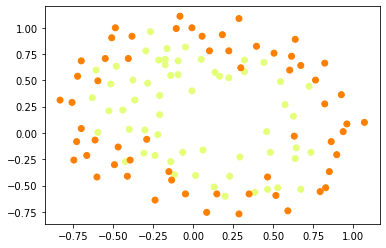

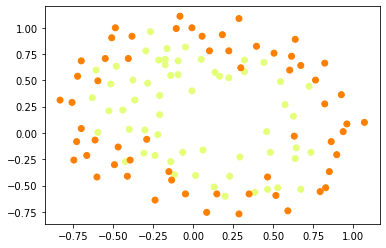

In [17]:
draw_classification(chips)

In [18]:
chips_features = np.array(chips.loc[:, ['x', 'y']])
chips_answers = np.vectorize(lambda classification: -1 if classification == 'P' else 1)(
    chips.loc[:, ['class']]).reshape(-1, )
chips_features

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [19]:
geysers = pd.read_csv('geyser.csv')
geysers

,x,y,class
0,1,4.4,N
1,1,3.9,N
2,1,4.0,P
3,1,4.0,N
4,1,3.5,N
...,...,...,...
217,23,2.1,P
218,23,4.2,N
219,23,2.1,P
220,23,5.2,N


,x,y,class
0,1,4.4,N
1,1,3.9,N
2,1,4.0,P
3,1,4.0,N
4,1,3.5,N
...,...,...,...
217,23,2.1,P
218,23,4.2,N
219,23,2.1,P
220,23,5.2,N


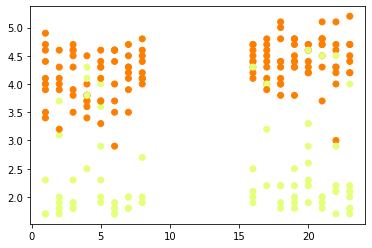

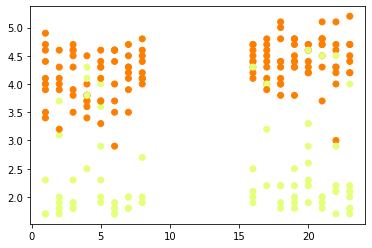

In [20]:
draw_classification(geysers)

In [21]:
geysers_features = np.array(geysers.loc[:, ['x', 'y']])
geysers_answers = np.vectorize(lambda classification: -1 if classification == 'P' else 1)(
    geysers.loc[:, ['class']]).reshape(-1, )
geysers_features

array([[ 1. ,  4.4],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  3.5],
       [ 1. ,  4.1],
       [ 1. ,  2.3],
       [ 1. ,  4.7],
       [ 1. ,  1.7],
       [ 1. ,  4.9],
       [ 1. ,  1.7],
       [ 1. ,  4.6],
       [ 1. ,  3.4],
       [ 2. ,  4.3],
       [ 2. ,  1.7],
       [ 2. ,  3.9],
       [ 2. ,  3.7],
       [ 2. ,  3.1],
       [ 2. ,  4. ],
       [ 2. ,  1.8],
       [ 2. ,  4.1],
       [ 2. ,  1.8],
       [ 2. ,  3.2],
       [ 2. ,  1.9],
       [ 2. ,  4.6],
       [ 2. ,  2. ],
       [ 3. ,  4.5],
       [ 3. ,  3.9],
       [ 3. ,  4.3],
       [ 3. ,  2.3],
       [ 3. ,  3.8],
       [ 3. ,  1.9],
       [ 3. ,  4.6],
       [ 3. ,  1.8],
       [ 3. ,  4.7],
       [ 3. ,  1.8],
       [ 3. ,  4.6],
       [ 3. ,  1.9],
       [ 3. ,  3.5],
       [ 4. ,  4. ],
       [ 4. ,  3.7],
       [ 4. ,  3.7],
       [ 4. ,  4.3],
       [ 4. ,  3.6],
       [ 4. ,  3.8],
       [ 4. ,  3.8],
       [ 4. ,  3.8],
       [ 4. ,

array([[ 1. ,  4.4],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  3.5],
       [ 1. ,  4.1],
       [ 1. ,  2.3],
       [ 1. ,  4.7],
       [ 1. ,  1.7],
       [ 1. ,  4.9],
       [ 1. ,  1.7],
       [ 1. ,  4.6],
       [ 1. ,  3.4],
       [ 2. ,  4.3],
       [ 2. ,  1.7],
       [ 2. ,  3.9],
       [ 2. ,  3.7],
       [ 2. ,  3.1],
       [ 2. ,  4. ],
       [ 2. ,  1.8],
       [ 2. ,  4.1],
       [ 2. ,  1.8],
       [ 2. ,  3.2],
       [ 2. ,  1.9],
       [ 2. ,  4.6],
       [ 2. ,  2. ],
       [ 3. ,  4.5],
       [ 3. ,  3.9],
       [ 3. ,  4.3],
       [ 3. ,  2.3],
       [ 3. ,  3.8],
       [ 3. ,  1.9],
       [ 3. ,  4.6],
       [ 3. ,  1.8],
       [ 3. ,  4.7],
       [ 3. ,  1.8],
       [ 3. ,  4.6],
       [ 3. ,  1.9],
       [ 3. ,  3.5],
       [ 4. ,  4. ],
       [ 4. ,  3.7],
       [ 4. ,  3.7],
       [ 4. ,  4.3],
       [ 4. ,  3.6],
       [ 4. ,  3.8],
       [ 4. ,  3.8],
       [ 4. ,  3.8],
       [ 4. ,

# Начнём перебор

In [22]:
def c_enumeration(features: List[np.ndarray],
                  answers: np.ndarray,
                  core: cores.Core) -> tuple[float, SVM]:
    cs = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
    c_best = 0
    accuracy_best = 0
    # features_train, features_test, answers_train, answers_test = train_test_split(features, answers, shuffle=True, test_size=0.3)
    for c in cs:
        svm = SVM(c)
        k_fold = KFold(n_splits=3, shuffle=True)
        accuracies = []
        for train_index, test_index in k_fold.split(features):
            features_train = features[train_index]
            features_test = features[test_index]
            answers_train = answers[train_index]
            answers_test = answers[test_index]
            core.fit(features_train)
            svm.fit(core, features_train, answers_train)
            accuracies.append(accuracy_score(answers_test, [svm.predict(feature) for feature in features_test]))
        accuracy = np.min(accuracies)
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            c_best = c
    best_core = core.fit(features)
    best_svm = SVM(c_best).fit(best_core, features, answers)
    return accuracy_best, best_svm


def linear_method(features: List[np.ndarray],
                  answers: np.ndarray) -> tuple[float, SVM]:
    linear_core = cores.LinearCore()
    return c_enumeration(features=features, answers=answers, core=linear_core)


def polynomial_method(features: List[np.ndarray],
                      answers: np.ndarray) -> tuple[float, SVM]:
    polynomial_accuracy = 0
    polynomial_svm = None
    degrees = [2, 3, 4, 5]
    pluses = [0, 1]
    for degree in degrees:
        for plus in pluses:
            polynomial_core = cores.PolynomialCore(degree, plus)
            polynomial_accuracy_candidate, polynomial_svm_candidate = c_enumeration(features=features, answers=answers,
                                                                                    core=polynomial_core)
            if polynomial_accuracy_candidate > polynomial_accuracy:
                polynomial_accuracy = polynomial_accuracy_candidate
                polynomial_svm = polynomial_svm_candidate
    return polynomial_accuracy, polynomial_svm


def gaussian_method(features: List[np.ndarray],
                    answers: np.ndarray) -> tuple[float, SVM]:
    gaussian_accuracy = 0
    gaussian_svm = None
    betas = [1, 2, 3, 4, 5]
    for beta in betas:
        gaussian_core = cores.GaussianCore(beta)
        gaussian_accuracy_candidate, gaussian_svm_candidate = c_enumeration(features=features, answers=answers,
                                                                            core=gaussian_core)
        if gaussian_accuracy_candidate > gaussian_accuracy:
            gaussian_accuracy = gaussian_accuracy_candidate
            gaussian_svm = gaussian_svm_candidate
    return gaussian_accuracy, gaussian_svm


def get_svms(features: List[np.ndarray],
             answers: np.ndarray) -> tuple[tuple[float, SVM], tuple[float, SVM], tuple[float, SVM]]:
    # Linear

    linear_thread = SVMThread(function=linear_method,
                              features=features,
                              answers=answers)
    linear_thread.start()

    # Polynomial

    polynomial_thread = SVMThread(function=polynomial_method,
                                  features=features,
                                  answers=answers)
    polynomial_thread.start()

    # Gaussian

    gaussian_thread = SVMThread(function=gaussian_method,
                                features=features,
                                answers=answers)
    gaussian_thread.start()

    linear_thread.join()
    polynomial_thread.join()
    gaussian_thread.join()

    return (linear_thread.accuracy, linear_thread.svm),\
           (polynomial_thread.accuracy, polynomial_thread.svm),\
           (gaussian_thread.accuracy, gaussian_thread.svm)

In [23]:
class DatasetRunner:

    def __init__(self, features: List[np.ndarray], answers: np.ndarray, dataset: str):
        self.features = features
        self.answers = answers
        self.dataset = dataset

    def run(self) -> None:
        linear, polynomial, gaussian = get_svms(features=self.features, answers=self.answers)
        print(f'Accuracy линейного ядра для {self.dataset} {linear[0]}, параметры c={linear[1].c}')
        print(f'Accuracy полиномиального ядра для {self.dataset} {polynomial[0]}, параметры c={polynomial[1].c}, degree={polynomial[1].core.degree}, plus={polynomial[1].core.plus}')
        print(f'Accuracy гауссовова ядра для {self.dataset} {gaussian[0]}, параметры c={gaussian[1].c}, beta={gaussian[1].core.beta}')
        models = [linear[1], polynomial[1], gaussian[1]]
        titles = [f'Линейное ядро для {self.dataset}', f'Полиномиальное ядро для {self.dataset}',
                  f'Гауссово ядро для {self.dataset}']

        fig, sub = plt.subplots(3, 1, figsize=(15, 20))
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        features_x, features_y = self.features[:, 0], self.features[:, 1]
        xx, yy = make_meshgrid(features_x, features_y)
        for model, title, ax in zip(models, titles, sub.flatten()):
            plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
            ax.scatter(features_x, features_y, c=self.answers, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
            ax.set_xlim(np.min(xx), np.max(xx))
            ax.set_ylim(np.min(yy), np.max(yy))
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(title)

        plt.show()

# Перебор и графики

In [24]:
def make_meshgrid(x: np.ndarray, y: np.ndarray, steps=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    steps: number of steps for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = np.min(x) - 1, np.max(x) + 1
    y_min, y_max = np.min(y) - 1, np.max(y) + 1
    h_x = (x_max - x_min) / steps
    h_y = (y_max - y_min) / steps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    return xx, yy


def plot_contours(ax, model: SVM, xx: np.ndarray, yy: np.ndarray, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    model: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    prediction = [[model.predict(np.array([xx[i][j], yy[i][j]])) for j in range(xx.shape[1])] for i in
                  range(xx.shape[0])]
    out = ax.contourf(xx, yy, prediction, **params)
    return out

# Графики для chips

Accuracy линейного ядра для chips 0.4358974358974359, параметры c=0.1
Accuracy полиномиального ядра для chips 0.5128205128205128, параметры c=100.0, degree=3, plus=1
Accuracy гауссовова ядра для chips 0.7, параметры c=50.0, beta=3


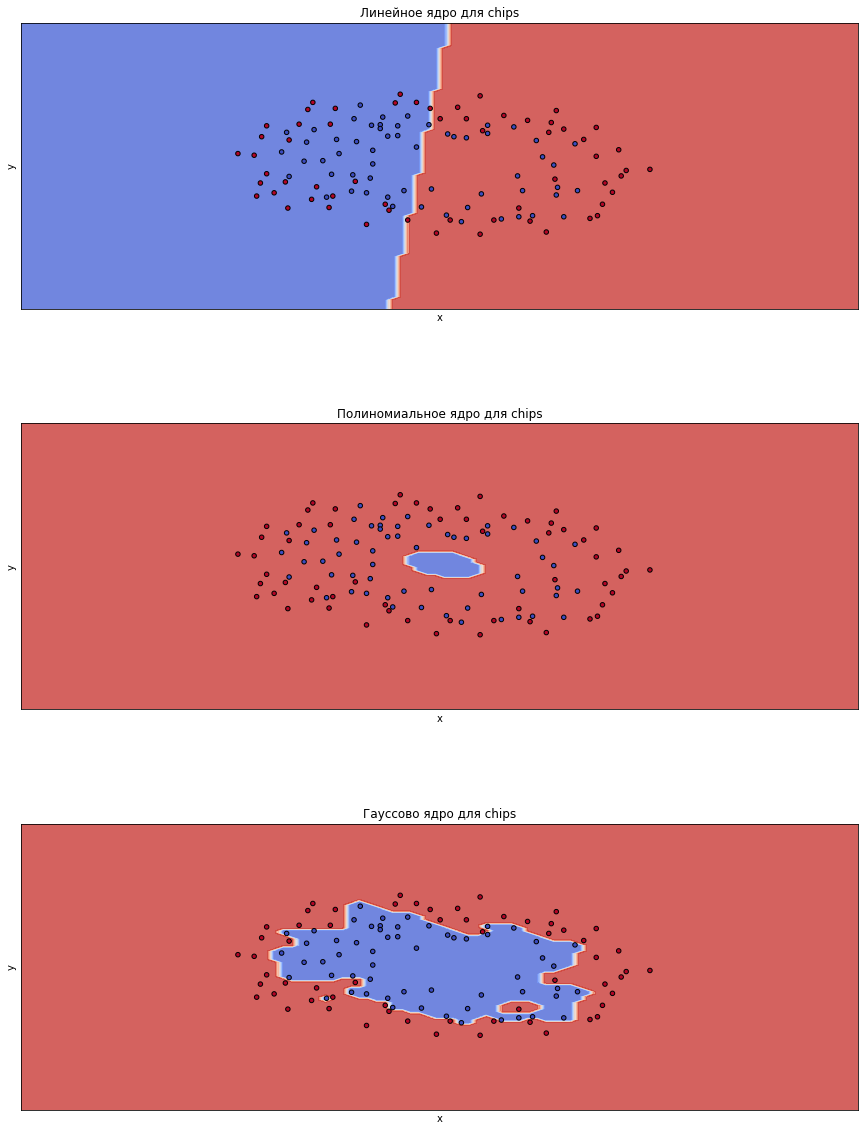

Accuracy линейного ядра для chips 0.425, параметры c=0.1
Accuracy полиномиального ядра для chips 0.5128205128205128, параметры c=0.05, degree=2, plus=1
Accuracy гауссовова ядра для chips 0.775, параметры c=50.0, beta=3


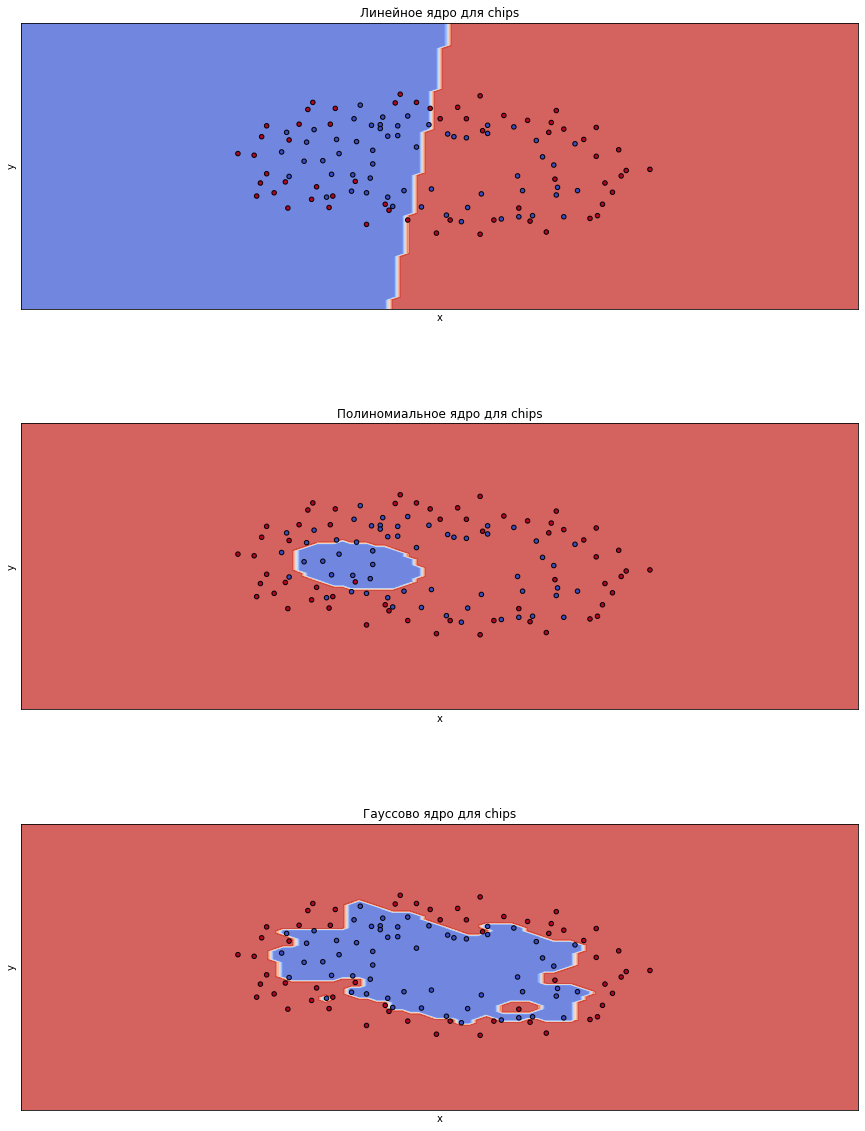

In [25]:
chips_runner = DatasetRunner(features=chips_features, answers=chips_answers, dataset='chips')
chips_runner.run()

# Графики для geysers

Accuracy линейного ядра для geysers 0.8918918918918919, параметры c=0.5
Accuracy полиномиального ядра для geysers 0.8648648648648649, параметры c=50.0, degree=2, plus=1
Accuracy гауссовова ядра для geysers 0.581081081081081, параметры c=0.5, beta=4


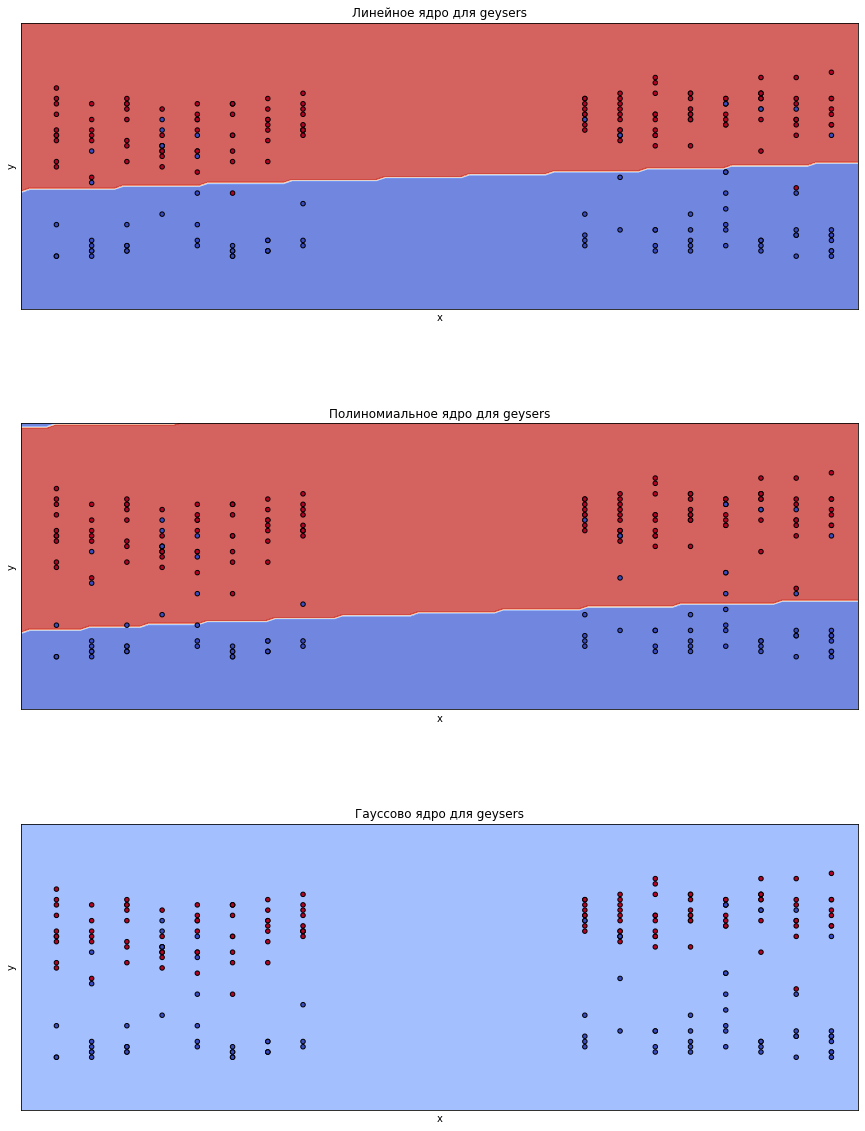

In [13]:
geysers_runner = DatasetRunner(features=geysers_features, answers=geysers_answers, dataset='geysers')
geysers_runner.run()